In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [5]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [6]:
x = data.data
y = data.target

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [15]:
lr.fit(x_train, y_train)

LinearRegression()

In [16]:
y_pred = lr.predict(x_test)

In [18]:
from sklearn.metrics import r2_score, mean_squared_error
print("r2_score: ",r2_score(y_test, y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score:  0.5188113124539249
RMSE:  48.72713760953253


In [43]:
from sklearn.linear_model import Ridge
# alpha here is labda (λ)
r = Ridge(alpha=0.1)

In [44]:
r.fit(x_train, y_train)

Ridge(alpha=0.1)

In [45]:
pred = r.predict(x_test)

In [46]:
print("r2_score: ",r2_score(y_test, pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test, pred)))

r2_score:  0.5208421054129915
RMSE:  48.62420568515607


### **NOTE**
> You need to tune(change the value of) hyperparameter(in this case lambda value) to improve the performance of the model

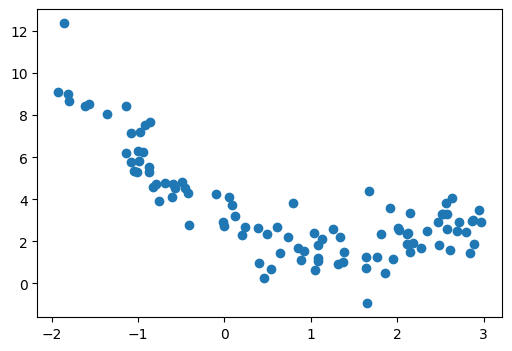

In [67]:
m = 100
x1 = 5 * np.random.rand(m, 1) -2
y = 0.7 * x1**2 -2*x1 + 3 + np.random.randn(m, 1)

plt.figure(figsize=(6, 4))
plt.scatter(x1, y)
plt.show()

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_ridge_prediction(x, y, alpha):
    model = Pipeline([
        ('poly_feature', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x, y)
    return model.predict(x)

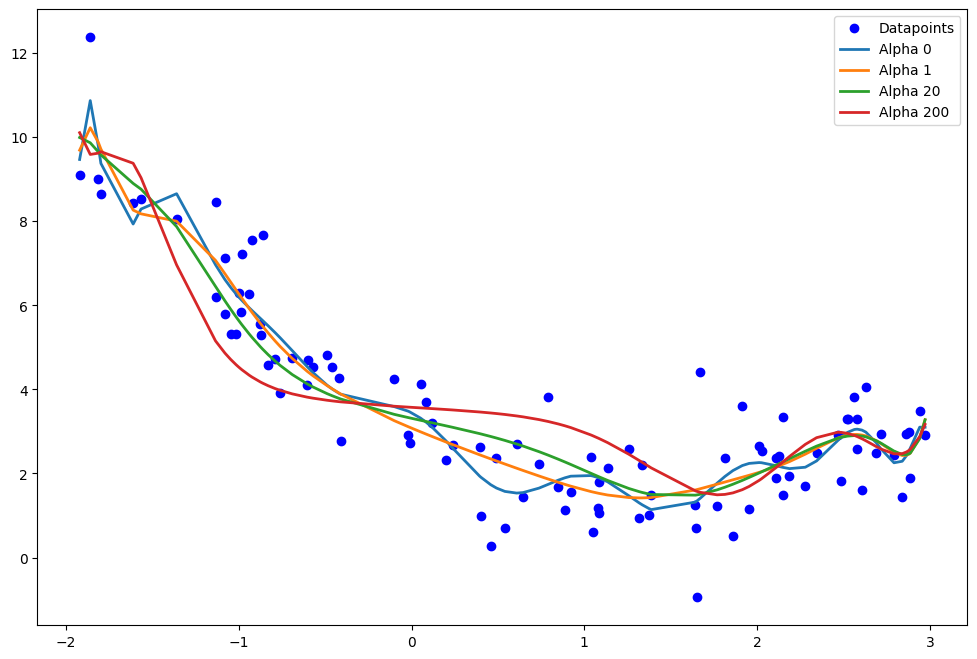

In [92]:
alphas = [0, 1, 20, 200]

plt.figure(figsize=(12, 8))
plt.plot(x1, y, 'bo', label="Datapoints")

for a in alphas:
    preds = get_ridge_prediction(x1, y, a)
    plt.plot(sorted(x1[:,0]), preds[np.argsort(x1[:,0])], linewidth=2,label=f"Alpha {a}")
plt.legend()
plt.show()